# Can we predict COVID-19 severeness based on full blood panel?

## Using machine learning models to predict COVID-19 severeness with full blood counts.

In [1]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Import data from AWS

In [50]:
# Load the COVID-19 blood data
blood_url = "COVID-19_patients_full_blood_counts_with_glucose.csv"
blood_df = pd.read_csv(blood_url,encoding =  "ISO-8859-1")
blood_df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient severeness,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationÊ(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose
0,0e80d061536740a,10,negative,0,-0.427254,-0.648900,0.311666,-0.438097,-1.414206,0.369540,-1.050367,-0.598296,0.998070,1.746323,-0.119138,2.529679,-0.299034,1.144057,-1.109751
1,1205a978ff0ef00,12,negative,0,-0.404364,-0.523588,-0.592784,-0.550290,-0.409276,0.036907,-0.552476,0.030615,-0.834685,-0.239998,1.102904,0.046015,0.909074,0.524862,-1.049182
2,0c6359f77661e20,16,negative,0,0.373847,0.102972,1.216117,-0.438097,-0.532689,0.198959,-0.950790,-0.448025,-0.223767,1.223607,-0.582671,1.868705,-0.955614,-0.536617,-1.049182
3,e91eeb27adfea76,1,negative,0,-0.175479,-0.084996,1.052813,0.571643,0.207786,0.318366,0.343725,-0.865444,0.081693,-0.553627,-0.414114,-0.795227,0.804021,-0.978899,-1.049182
4,ab9745da9d139b9,15,positive,2,-0.495919,-0.398276,-0.718402,-0.438097,-0.567950,-0.935404,0.244149,-0.820919,-1.140144,0.334989,-0.666950,0.226280,-0.456613,-0.978899,-0.928044


In [51]:
# Delete patient ID column
blood_df = blood_df.drop(['Patient ID'], axis=1)
blood_df.head()

,Patient age quantile,SARS-Cov-2 exam result,Patient severeness,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationÊ(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose
0,10,negative,0,-0.427254,-0.648900,0.311666,-0.438097,-1.414206,0.369540,-1.050367,-0.598296,0.998070,1.746323,-0.119138,2.529679,-0.299034,1.144057,-1.109751
1,12,negative,0,-0.404364,-0.523588,-0.592784,-0.550290,-0.409276,0.036907,-0.552476,0.030615,-0.834685,-0.239998,1.102904,0.046015,0.909074,0.524862,-1.049182
2,16,negative,0,0.373847,0.102972,1.216117,-0.438097,-0.532689,0.198959,-0.950790,-0.448025,-0.223767,1.223607,-0.582671,1.868705,-0.955614,-0.536617,-1.049182
3,1,negative,0,-0.175479,-0.084996,1.052813,0.571643,0.207786,0.318366,0.343725,-0.865444,0.081693,-0.553627,-0.414114,-0.795227,0.804021,-0.978899,-1.049182
4,15,positive,2,-0.495919,-0.398276,-0.718402,-0.438097,-0.567950,-0.935404,0.244149,-0.820919,-1.140144,0.334989,-0.666950,0.226280,-0.456613,-0.978899,-0.928044


### Test different machine learning models

In [52]:
# Define the feature and target
X = blood_df.drop(['SARS-Cov-2 exam result', 'Patient severeness'], axis=1)
y = blood_df['Patient severeness']

### Logitic Regression Model

In [53]:
# Split the dataset to training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
#Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
#Fit (train) or model using the training data
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#Validate the model using the test data
print(f"Training data score of the logistic regression model: {classifier.score(X_train, y_train)}")
print(f"Testing data score of the logistic regression model: {classifier.score(X_test, y_test)}")

Training data score of the logistic regression model: 0.8
Testing data score of the logistic regression model: 0.6346153846153846


### Decision Trees Model

In [10]:
from sklearn import tree

In [11]:
# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [14]:
print(f"Training data score of the decision trees model: {clf.score(X_train, y_train)}")
print(f"Testing data score of the decision trees model: {clf.score(X_test, y_test)}")

Training data score of the decision trees model: 1.0
Testing data score of the decision trees model: 0.75


### Random Forest Model

In [54]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)

In [55]:
print(f"Training data score of the random forest model: {rf.score(X_train, y_train)}")
print(f"Testing data score of the random forest model: {rf.score(X_test, y_test)}")

Training data score of the random forest model: 1.0
Testing data score of the random forest model: 0.7884615384615384


In [56]:
# Check the feature importance
importances = rf.feature_importances_
importances

[x for x in zip(rf.feature_importances_, X.columns)]

[(0.04135160342980108, 'Patient age quantile'),
 (0.06438629890887634, 'Hematocrit'),
 (0.07526265052927236, 'Hemoglobin'),
 (0.06486572897890557, 'Platelets'),
 (0.24005280895732325, 'Mean platelet volume '),
 (0.06278389797275855, 'Red blood Cells'),
 (0.041498484251968795, 'Lymphocytes'),
 (0.042902306076418595, 'Mean corpuscular hemoglobin concentrationÊ(MCHC)'),
 (0.04543140276168288, 'Leukocytes'),
 (0.03270405097192204, 'Basophils'),
 (0.040918897873149285, 'Mean corpuscular hemoglobin (MCH)'),
 (0.049749257269160845, 'Eosinophils'),
 (0.05572030319233077, 'Mean corpuscular volume (MCV)'),
 (0.042662974301994804, 'Monocytes'),
 (0.048527822706202574, 'Red blood cell distribution width (RDW)'),
 (0.0511815118182324, 'Serum Glucose')]

In [19]:
# Check the whole set score
print(f"The whole dataset score of the random forest model: {rf.score(X, y)}")

The whole dataset score of the random forest model: 0.9371980676328503


### Plot confusion matrix

In [36]:
#import confusion matrix function
from sklearn.metrics import plot_confusion_matrix

Non-normalized Confusion Matrix
[[37  0  2]
 [ 1  4  0]
 [ 8  0  0]]


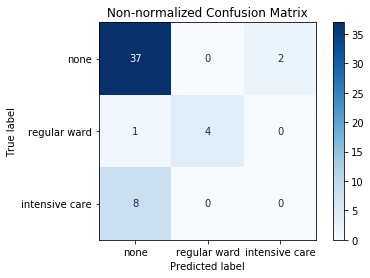

In [57]:
disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Non-normalized Confusion Matrix")

print("Non-normalized Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

## Using machine learning models to predict COVID-19 severeness with serum glucose level.

### Import data from AWS

In [20]:
# Load the COVID-19 glucose data
url = "COVID-19_patients_serum_glucose.csv"
glucose_df = pd.read_csv(url)
glucose_df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient Severeness,Serum Glucose
0,527e4115cf86b6b,14,negative,intensive care,-0.352639
1,a4b2116e0689f54,0,negative,intensive care,-0.322355
2,8733b5587ba412f,19,negative,intensive care,-0.170933
3,0edc1a366792b62,0,negative,intensive care,0.192481
4,d9c2385bfe97417,19,negative,intensive care,0.343903


In [21]:
# Define the feature and target
X = glucose_df[["Patient age quantile", "Serum Glucose"]]
y = glucose_df["Patient Severeness"]
print(X.shape, y.shape)

(208, 2) (208,)


In [22]:
# Split the dataset to training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Logitic Regression Model

In [23]:
# Setup logistic regression model
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Use training set to fit the model
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Print the score for both training and testing sets
print(f"Training data score of the logistic regression model: {classifier.score(X_train, y_train)}")
print(f"Testing data score of the logistic regression model: {classifier.score(X_test, y_test)}")

Training data score of the logistic regression model: 0.7307692307692307
Testing data score of the logistic regression model: 0.6538461538461539


### Decision Trees Model

In [27]:
# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [28]:
print(f"Training data score of the decision trees model: {clf.score(X_train, y_train)}")
print(f"Testing data score of the decision trees model: {clf.score(X_test, y_test)}")

Training data score of the decision trees model: 0.967948717948718
Testing data score of the decision trees model: 0.5384615384615384


### Random Forest Model

In [29]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)

In [30]:
print(f"Training data score of the random forest model: {rf.score(X_train, y_train)}")
print(f"Testing data score of the random forest model: {rf.score(X_test, y_test)}")

Training data score of the random forest model: 0.967948717948718
Testing data score of the random forest model: 0.5769230769230769


In [31]:
# Check the feature importance
importances = rf.feature_importances_
importances

[x for x in zip(rf.feature_importances_, X.columns)]

[(0.38511814455087423, 'Patient age quantile'),
 (0.6148818554491258, 'Serum Glucose')]

### Use the logistic regression model to do the prediction

In [33]:
# Check the prediction results of the model
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
186,none,none
155,none,none
165,none,none
200,none,none
58,none,regular ward
34,none,regular ward
151,none,none
18,none,intensive care
202,none,none
62,none,none


In [37]:
class_names = ["none", "regular ward", "intensive care"]

### Plot confusion matrix

Non-normalized Confusion Matrix
[[ 1  8  0]
 [ 1 33  0]
 [ 0  9  0]]


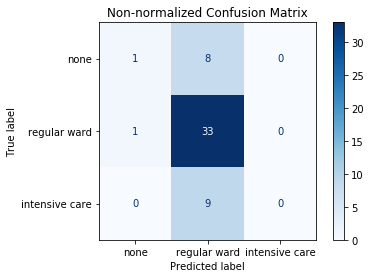

In [49]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Non-normalized Confusion Matrix")

print("Non-normalized Confusion Matrix")
print(disp.confusion_matrix)

plt.show()